# Bibliotecas utilizadas


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import plotly.graph_objects as go

# Questão 1

Letra a)

Inicialmente temos a seguinte função:
$$
f(x) = \sqrt{x}
$$
Utilizando o Polinômio de taylor:
$$
P_{i}(x) = \sum_{n=0}^{i} \frac{f^{(n)}(a)}{n!} (x - a)^{n}
$$

Foram encontrados:
$$
P_{1}(x) = 4 + \frac{(x-16)}{8}
$$
$$
P_{2}(x) = 4 + \frac{(x-16)}{8} - \frac{1}{256}\cdot\frac{(x-16)^2}{2!}
$$
$$
P_{3}(x) = 4 + \frac{(x-16)}{8} - \frac{1}{256}\cdot\frac{(x-16)^2}{2!} + \frac{3}{8192}\cdot\frac{(x-16)^3}{3!}
$$
$$
P_{3}(x) = 4 + \frac{(x-16)}{8} - \frac{1}{256}\cdot\frac{(x-16)^2}{2!} + \frac{3}{8192}\cdot\frac{(x-16)^3}{3!} - \frac{15}{2^{18}}\cdot\frac{(x-16)^4}{4!}
$$

In [40]:
#Definindo o domínio e imagem da função e de seus polinômios

x = np.linspace(0,32,500)                          # Intervalo pedido
y = x**(1/2)                                       # Função
y1 = 4 + ((x-16)/(2**3))                           # Poli. grau 1
y2 = y1 - (1/(2**8))*((x-16)**2/m.factorial(2))    # Poli. grau 2
y3 = y2 + (3/(2**13))*((x-16)**3/m.factorial(3))   # Poli. grau 3
y4 = y3 - (15/(2**18))*((x-16)**4/m.factorial(4))  # Poli. grau 4

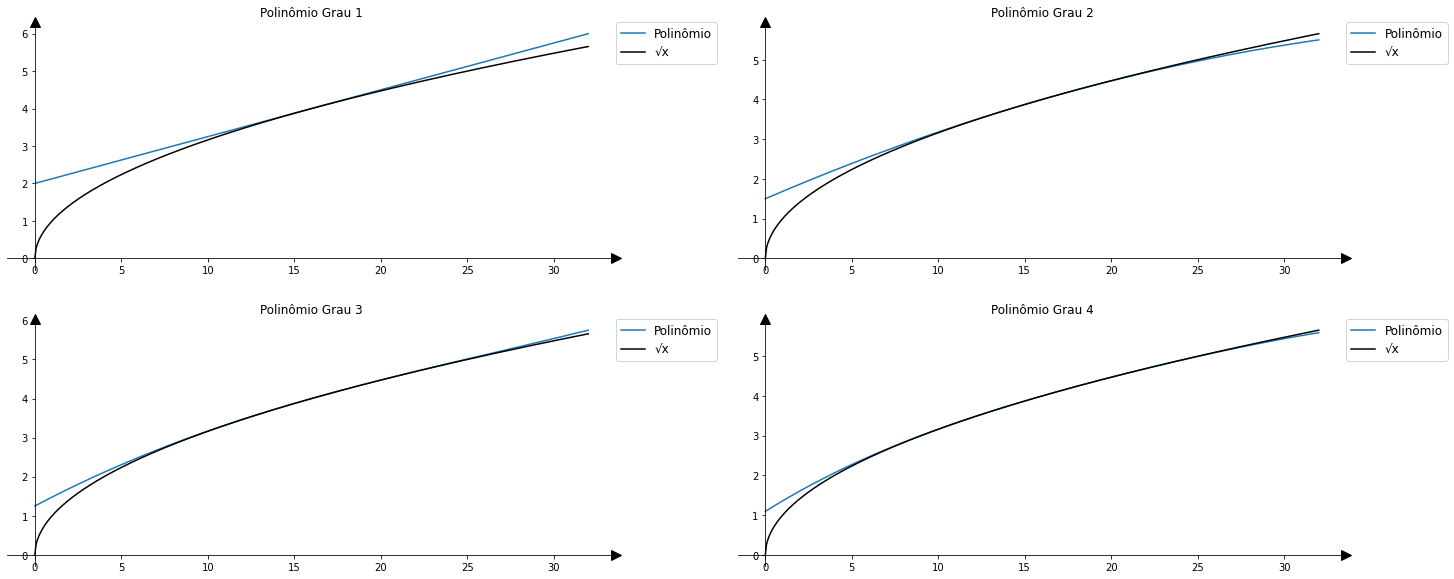

In [41]:
#Plotando o gráfico da função juntamente com os polinômios de diferentes graus

plt.rcParams["figure.figsize"]=24,10
fig, ax = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        ax[i,j].spines['left'].set_position('zero')
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['bottom'].set_position('zero')
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].xaxis.set_ticks_position('bottom')
        ax[i,j].yaxis.set_ticks_position('left')

        ax[i,j].plot((1), (0), ls="", marker=">", ms=10, color="k", transform=ax[i,j].get_yaxis_transform(), clip_on=False)
        ax[i,j].plot((0), (1), ls="", marker="^", ms=10, color="k", transform=ax[i,j].get_xaxis_transform(), clip_on=False)

ax[0,0].plot(x,y1,label="Polinômio")
ax[0,0].plot(x,y,"black",label="√x")
ax[0,0].set_title("Polinômio Grau 1")
ax[0,0].legend(bbox_to_anchor=(1, 1),loc='upper left', borderaxespad=0,fontsize=12)

ax[0,1].plot(x,y2,label="Polinômio")
ax[0,1].plot(x,y,"black",label="√x")
ax[0,1].set_title("Polinômio Grau 2")
ax[0,1].legend(bbox_to_anchor=(1, 1),loc='upper left', borderaxespad=0,fontsize=12)

ax[1,0].plot(x,y3,label="Polinômio")
ax[1,0].plot(x,y,"black",label="√x")
ax[1,0].set_title("Polinômio Grau 3")
ax[1,0].legend(bbox_to_anchor=(1, 1),loc='upper left', borderaxespad=0,fontsize=12)

ax[1,1].plot(x,y4,label="Polinômio")
ax[1,1].plot(x,y,"black",label="√x")
ax[1,1].set_title("Polinômio Grau 4")
ax[1,1].legend(bbox_to_anchor=(1, 1),loc='upper left', borderaxespad=0,fontsize=12)

Letra b)

Para 16 < x < 17, temos:
$$
M=|f^{(5)}(16)|=\frac{105}{32}16^{\frac{-7}{2}}=\frac{105}{524288}
$$
$$
|R_{4}(x)|\leq \frac{M}{5!}|x-16|^5
$$

In [51]:
#Definindo os parâmetros para o resto

x = np.linspace(16,17,100)
M = 105/524288
y = (M/m.factorial(5))*((abs(x-16))**5)

#Erro real f(x) - P4(x)
y0 = np.sqrt(x)
y1 = 4 + ((x-16)/(2**3))                           # Poli. grau 1
y2 = y1 - (1/(2**8))*((x-16)**2/m.factorial(2))    # Poli. grau 2
y3 = y2 + (3/(2**13))*((x-16)**3/m.factorial(3))   # Poli. grau 3
y4 = y3 - (15/(2**18))*((x-16)**4/m.factorial(4))  # Poli. grau 4  # Poli. grau 4
yreal = y0 - y4

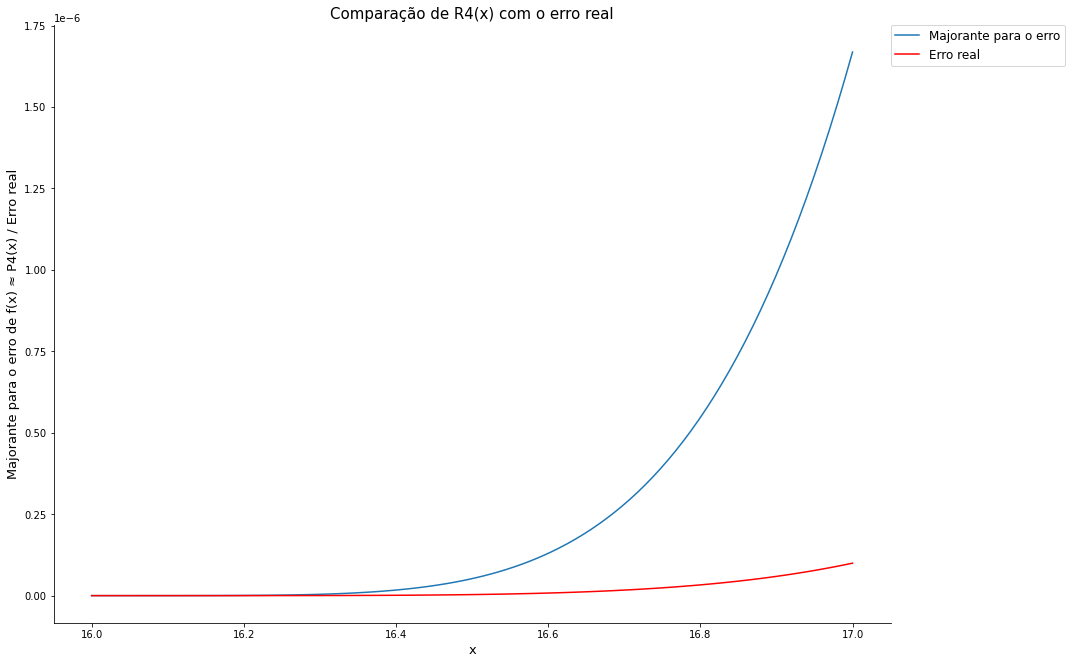

In [62]:
#Plotando o gráfico de R4(x) para o intervalo 16 < x < 17

plt.rcParams["figure.figsize"]=15,11
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Comparação de R4(x) com o erro real",fontsize='15')
ax.set_xlabel("x",fontsize='13')
ax.set_ylabel("Majorante para o erro de f(x) ≈ P4(x) / Erro real",fontsize='13')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(x, y,label="Majorante para o erro")
ax.plot(x, yreal,'red',label="Erro real")
ax.legend(bbox_to_anchor=(1, 1),loc='upper left', borderaxespad=0,fontsize=12)

# Questão 2

Letra a)

Inicialmente temos a seguinte função para a resistividade:
$$
ρ(t) = ρ_{20}e^{α(t−20)}
$$
Usando o Polinômio de Taylor:
$$
P_{n}(x) = \sum_{i=0}^{n} \frac{f^{(i)}(a)}{i!} (x - a)^{i}
$$
Foram encontrados:
$$
P_{1}(t) = ρ_{20}\cdot(1 + α(t−20))
$$
$$
P_{2}(t) = ρ_{20}\cdot(1 + α(t−20) + α^2\frac{(t-20)^2}{2}) 
$$
Onde:
$$
ρ_{20} = 1.7\cdot10^{-8}\qquad\quad α = 0.0039
$$

Letra b)

In [44]:
#Definindo o domínio e imagem da função e de seus polinômios

alfa = 0.0039
resis = 1.7*(10**-8)
x = np.linspace(-250,1000,1000)             # Intervalo pedido
y0 = resis*(m.e**(alfa*(x-20)))             # Função
y1 = resis*(1 + alfa*(x-20))                # Poli. grau 1
y2 = (y1 + resis*((alfa**2)*((x-20)**2))/2) # Poli. grau 2      

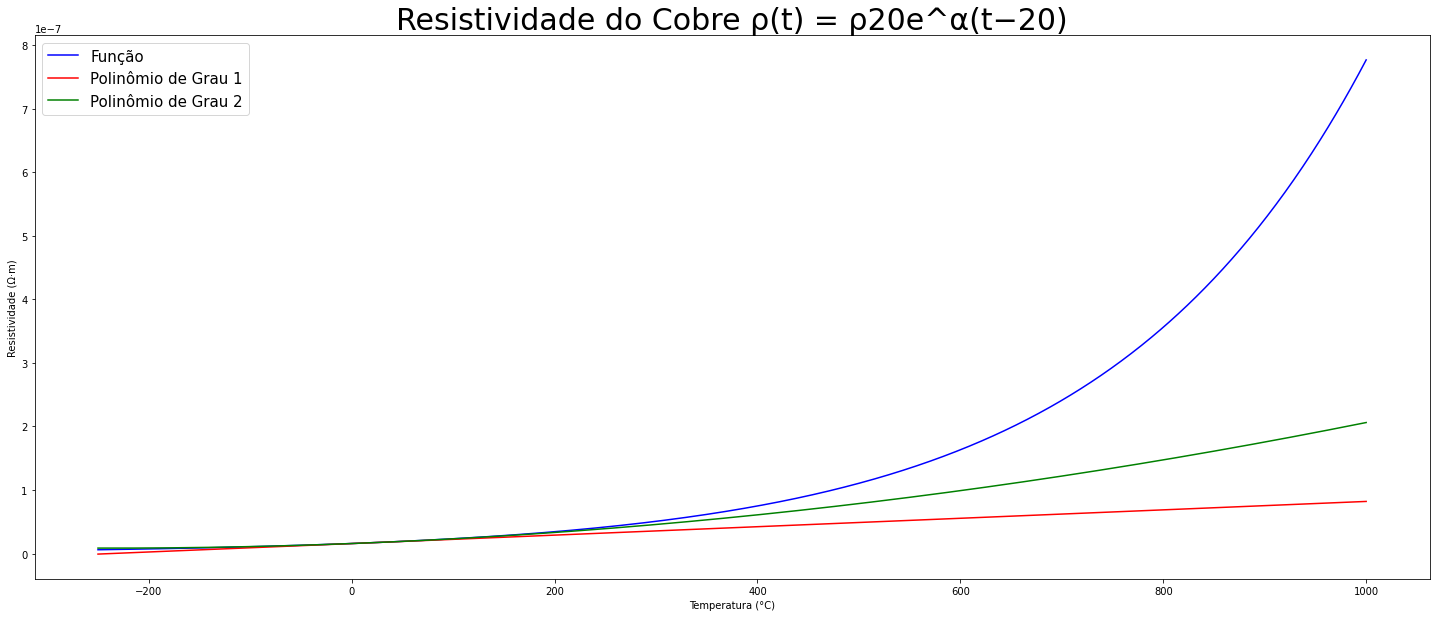

In [45]:
#Plotando o gráfico da função e dos polinômios de primeiro e segundo grau

plt.rcParams["figure.figsize"]=25,10
fig, ax = plt.subplots()

ax.plot(x, y0, 'blue', label='Função')
ax.plot(x, y1, 'red', label='Polinômio de Grau 1')
ax.plot(x, y2, 'green', label='Polinômio de Grau 2')

ax.set_title("Resistividade do Cobre ρ(t) = ρ20e^α(t−20)", fontsize='30')
ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Resistividade (Ω·m)")
leg = ax.legend(loc='upper left', fontsize='15')

Letra c)

Para que a aproximação linear fique numa faixa de 1% do valor exato da resistividade temos que:

<br>

$$
\frac{|ρ(t) - P_{1}(t)|}{ρ(t)}\cdot100 \leq 1
$$
Onde:
$$⠀⠀
ρ(t) = ρ_{20}e^{α(t−20)}\qquad\quad P_{1}(t) = ρ_{20}\cdot(1 + α(t−20))
$$

In [46]:
#Testando os valores de t dentro do intervalo usado anteriormente que satisfazem a equação acima

def f(x):                                # Função ρ(t)
    return resis*(m.e**(alfa*(x-20)))

def linear(x):                           # Poli. grau 1 P1(t)
    return resis*(1 + alfa*(x-20))

x = np.linspace(-250,1000,1000) 
x1 = []
for i in x:
    if (abs(f(i) - linear(i))/f(i))*100 <= 1:
        x1.append(i)

x1 = np.array(x1)
y1 = linear(x1)

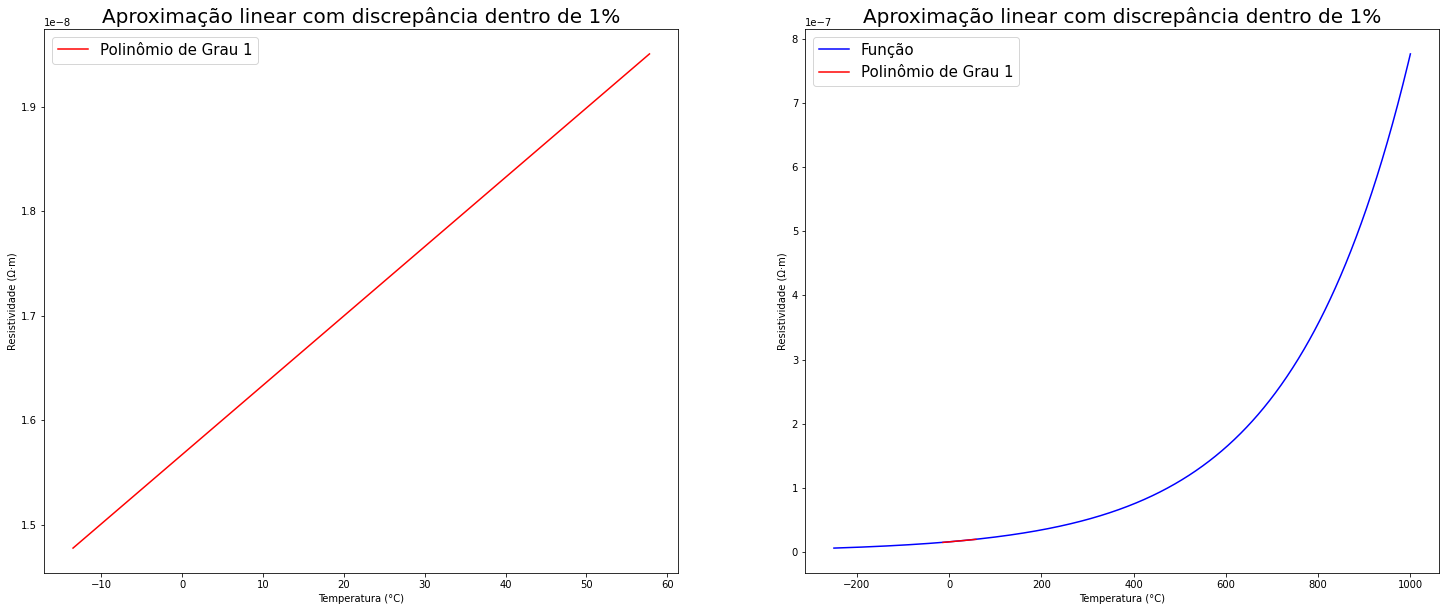

In [47]:
#Plotando o gráfico do intervalo da aproximação linear que satizfaz 1% de discrepância e demonstrando em perspectiva com o intervalo o intervalo original

plt.rcParams["figure.figsize"]=25,10
fig, ax = plt.subplots(1,2)

ax[1].plot(x, y0, 'blue', label='Função')

for i in range(2):
    ax[i].plot(x1, y1, 'red', label='Polinômio de Grau 1')
    ax[i].set_title("Aproximação linear com discrepância dentro de 1%", fontsize='20')
    ax[i].set_xlabel("Temperatura (°C)")
    ax[i].set_ylabel("Resistividade (Ω·m)")
    leg = ax[i].legend(loc='upper left', fontsize='15')

# Questão 3

Letra d)

Inicialmente temos:
$$
w=f(z)=z^2+2z+2
$$
Desenvolvendo a expressão com z=x+iy é possivel encontrar:
$$
w=(x^2-y^2+2x+2)+i(2xy+2y)
$$
Dessa forma, para satizfazer Re(w)=0, temos:
$$
x^2-y^2+2x+2 = 0 \quad \Leftrightarrow \quad y^2-(x+1)^2= 1
$$
E para satisfazer Im(w)=0, temos:
$$
2xy+2y = 0
$$
$$
x=-1 \quad ou \quad y=0
$$
Ou seja:
$$
u=x^2-y^2+2x+2
$$
$$
Caso \quad 1 \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad \quad Caso \quad 2
$$
$$
x=-1  \quad \qquad \qquad \qquad \qquad \qquad \qquad \qquad  \qquad y=0
$$
$$
u = 1 - y^2  \quad \quad \quad \quad \quad \qquad \qquad \qquad \quad u = (x+1)^2 + 1
$$

In [48]:
#Definindo o domínio e imagem das funções
# z = x + iy   w = u + iv

#Definindo a superfície
x = np.linspace(-4,2,100)
y = np.linspace(-2,2,100)
x,y = np.meshgrid(x,y)
u = x**2 - y**2 + 2*x + 2
v = 2*x*y + 2*y

#Definindo a curva para Re(w)=0
x1 = np.linspace(-1 - np.sqrt(3), -1 + np.sqrt(3), 100)
y1 = np.sqrt(1 + (x1+1)**2)
u1 = x1**2 - y1**2 + 2*x1 + 2

#Definindo a curva para o caso 1 de Im(w)=0, x=-1
x2 = np.linspace(-1,-1,100)
y2 = np.linspace(-2,2,100)
u2 = 1 - y2**2 

#Definindo a curva para o caso 2 de Im(w)=0, y=0
x3 = np.linspace(-4,2,100)
y3 = np.linspace(0,0,100)
u3 = (x3+1)**2 + 1

In [49]:
#Plotando o gráfico da superfície e das curvas anteriormente definidas

fig= go.Figure()
fig.add_surface(z=u, x=x, y=y,surfacecolor=v,colorscale = 'jet')
fig.add_scatter3d(x= x1, y= y1, z=u1, mode="lines",name='u=0', line=dict(color="black",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x1, y=-y1, z=u1, mode="lines", showlegend=False, line=dict(color="black",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x2, y=y2, z=u2, mode="lines",name='v=0', line=dict(color="blue",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x3, y=y3, z=u3, mode="lines", showlegend=False, line=dict(color="blue",colorscale='blackbody', width=5))

fig.update_layout(title='w = f(z) = z² + 2z + 2, colorido de acordo com v(parte imaginária de w ou Im(f(z)))', legend=dict(x=0,y=1), autosize=False, width=800, height=600,scene = dict(xaxis_title='Re(z)',yaxis_title='Im(z)',zaxis_title='Re(f(z))'))

fig.show()